# Marketing Campaign Analysis

### Problem Statement

The goal of this project is to develop a machine learning model that predicts a customer's response to an offer for a specific product or service. The model will enable targeted marketing strategies and optimize campaign effectiveness.


##  1. Loading libraries and data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to download the plots
# import matplotlib
# matplotlib.use('agg')

onecolor='#7BFB74'
yncolor = ['#0586C7','#0B7605']
scattercolor = '#074F03'

# Defining color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# to perform feature encoding
from sklearn import preprocessing

# for train test split
from sklearn.model_selection import train_test_split

#  classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# import evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./dataset/marketing_campaign.csv',sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

___

## 2. Reading data documentation

### Dataset
We have a dataset containing customer information, including demographic data, transaction history, and previous campaign interactions. The dataset also includes a binary target variable indicating whether the customer responded to the offer or not.


## 3. Exploratory Data Analysis
### 3.1 Univariate data analysis

In [5]:
# datatype
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# descriptive statistics of the data
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# change datatype of Dt_Customer
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)

In [9]:
# Duplicates
data.duplicated(subset=['ID']).sum()

0

In [10]:
# missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

> *Our data looks pretty clean, except for Income, for which there are **24 missing values** (around 1%).  
We can move on with the data as it is for EDA but as we are not just doing EDA but also modeling,So let's drop the rows.*

In [11]:
 # Drop rows with missing values in the column
data = data.dropna()

In [12]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 3.1.1 Numeric data

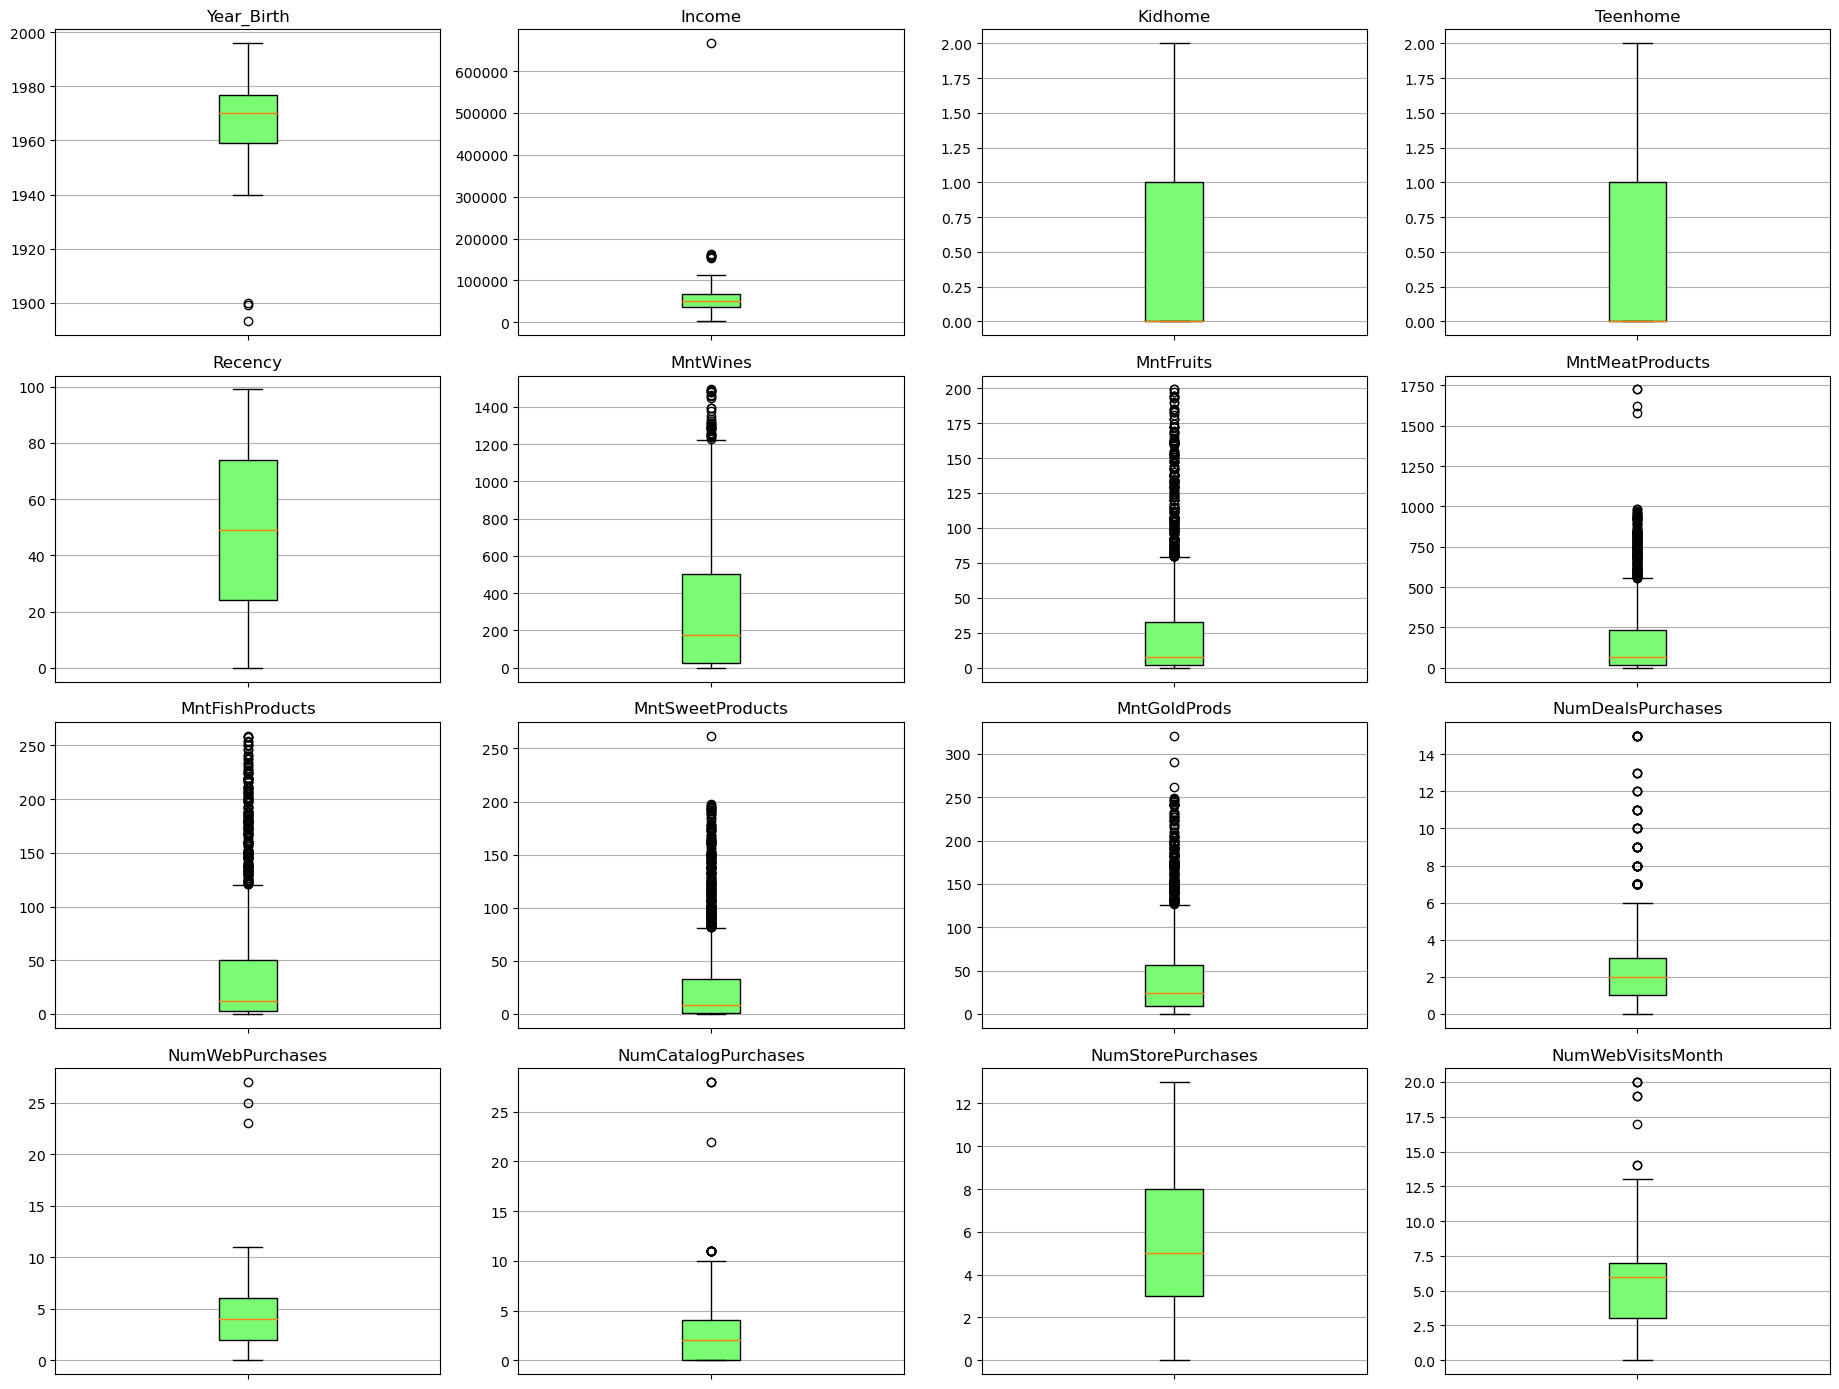

In [13]:
num_vars = [
    'Year_Birth', 'Income', 'Kidhome','Teenhome','Recency', 
    'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    ] 

fig, axes = plt.subplots(nrows=4,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(data[col], patch_artist=True)
    box['boxes'][0].set_facecolor(onecolor)
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

#to download the plot
# plt.savefig('31Numeric data boxplots', format='png')

Two continuous variables that are not in the above plots are: **Z_CostContact** and **Z_Revenue**, which are always equal to 3 and 11, respectively. I assume they mean the cost of contacting a customer and the associated revenue if a customer accepts the offer, although we can’t be 100% sure. Either way, since they are constants, they are not relevant for our exploratory data analysis.

### 3.1.2 Categorical data

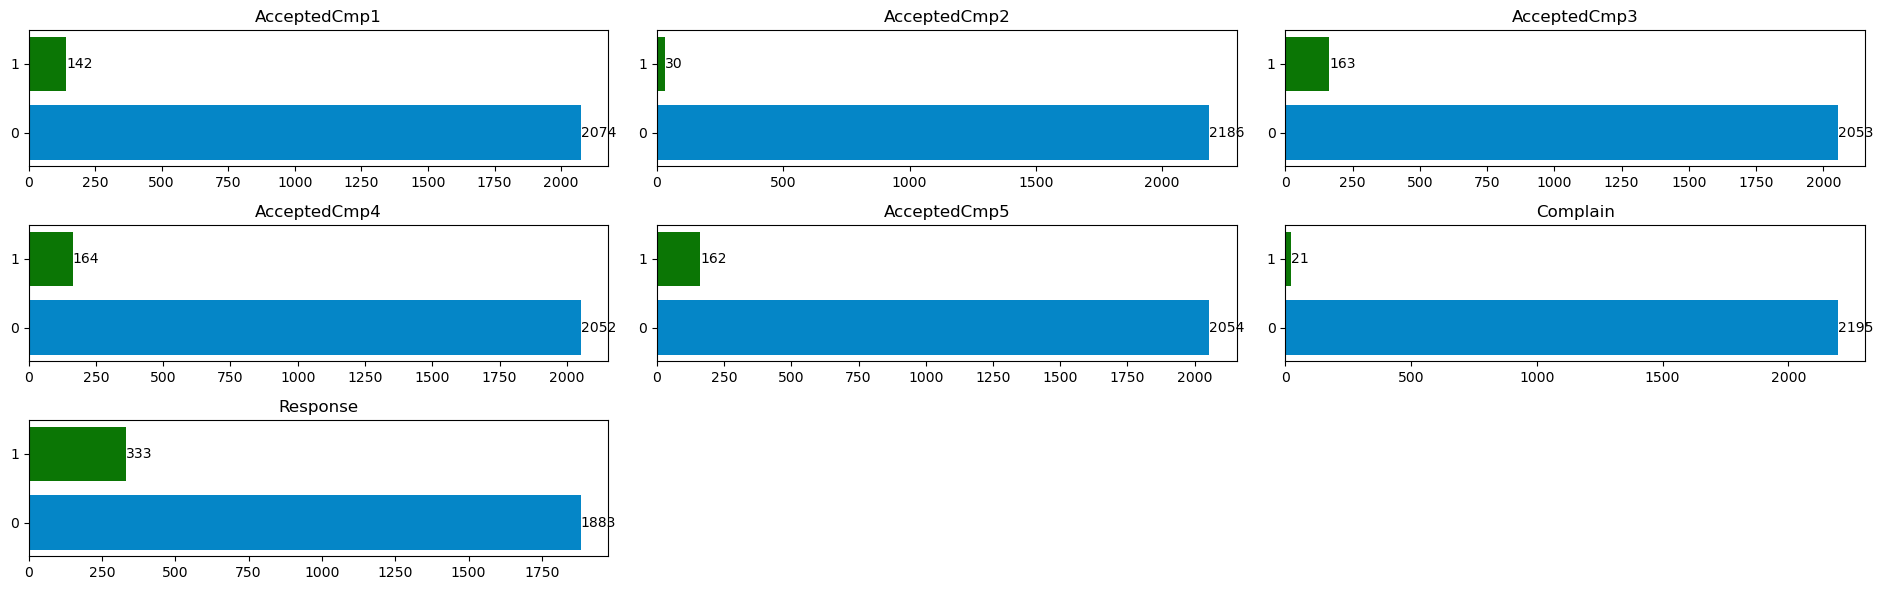

In [14]:
# AcceptedCmp, Complain and Response
cat_vars = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'
]

# create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(19, 6)) 

for i, ax in enumerate(axes.flatten()):
    if i < len(cat_vars):
        counts = data[cat_vars[i]].value_counts()
        ax.barh(counts.index, counts.values, color=yncolor)  # Interchanged x and y(barh)
        ax.set_title(cat_vars[i])

        # Set y-tick labels
        ax.set_yticks(range(len(counts)))  # Changed to set_yticks
        ax.set_yticklabels(counts.index)  # Changed to set_yticklabels

        # Add values inside the bars 
        for j, v in enumerate(counts.values):
            ax.text(v, j, str(v), ha='left', va='center', weight='medium', size='medium')  

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#to download the plot
# plt.savefig('32Categorical data hori_barplots', format='png')

In [15]:
# more detail on complain 
data.Complain.describe()

count    2216.000000
mean        0.009477
std         0.096907
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64

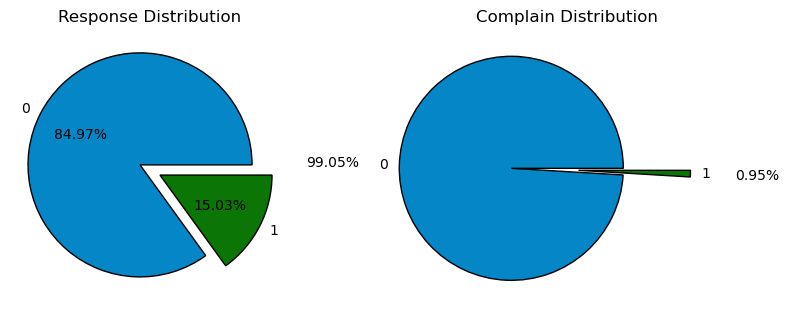

In [16]:
# Get the value counts for 'Response'
response_counts = data['Response'].value_counts()

# Get the value counts for 'Complain'
complain_counts = data['Complain'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create the pie plot for 'Response' in the first subplot
axes[0].pie(response_counts, labels=response_counts.index, autopct='%.2f%%', colors=yncolor, 
            explode=[.1,.1], wedgeprops={'edgecolor':"Black"})
axes[0].set_title('Response Distribution')

# Create the pie plot for 'Complain' in the second subplot
axes[1].pie(complain_counts, labels=complain_counts.index, autopct='%.2f%%', colors=yncolor, 
            explode=[0.5,.1], wedgeprops={'edgecolor':"Black"}, pctdistance=1.6)
axes[1].set_title('Complain Distribution')

# , explode=[1,.1], wedgeprops={'edgecolor':"Black"}, pctdistance=2

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

#to download the plot
# plt.savefig('33Categorical data indetail piplots', format='png')

In [17]:
# Marital Status
data['Marital_Status'].unique() # to check unique values

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
# replace values to single for easy understanding
data['Marital_Status'].replace(['Absurd', 'YOLO','Alone'],'Single', inplace=True) 

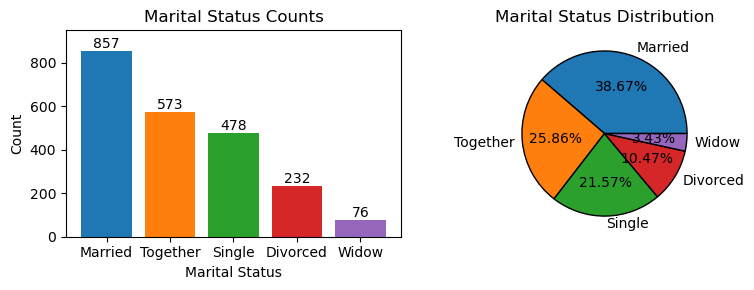

In [19]:
# Get the value counts for 'Marital_Status'
marital_counts = data['Marital_Status'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Plot the bar plot on the first subplot
bars = axes[0].bar(marital_counts.index, marital_counts.values, color=color_palette)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylim(0,950)
axes[0].set_ylabel('Count')
axes[0].set_title('Marital Status Counts')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Plot the pie plot on the second subplot
axes[1].pie(marital_counts, labels=marital_counts.index, autopct='%.2f%%', colors=color_palette, wedgeprops={'edgecolor':"Black"})
axes[1].set_title('Marital Status Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

#to download the plot
# plt.savefig('34Marital_Status bar_n_pi_plots', format='png')

In [20]:
# Education
data['Education'].unique() # to check unique values

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

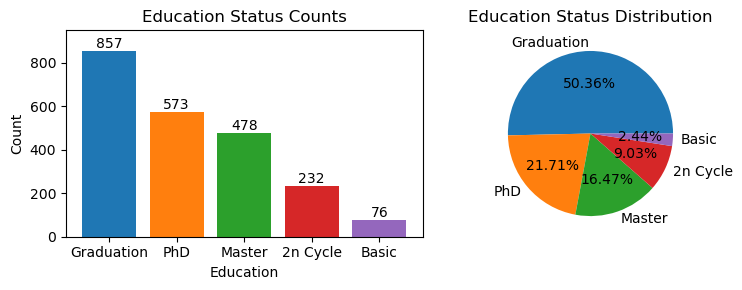

In [21]:
# Get the value counts for 'Education'
edu_counts = data['Education'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Plot the bar plot on the first subplot
bars = axes[0].bar(edu_counts.index, marital_counts.values, color=color_palette)
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0,950)
axes[0].set_title('Education Status Counts')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Plot the pie plot on the second subplot
axes[1].pie(edu_counts, labels=edu_counts.index, autopct='%.2f%%', colors=color_palette)
axes[1].set_title('Education Status Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

#to download the plot
# plt.savefig('35Education_Status bar_n_pi_plots', format='png')

### 3.1.3 Date

In [22]:
# Dt_Customer
data.Dt_Customer.describe(datetime_is_numeric=True)

count                             2216
mean     2013-07-11 23:50:54.151624704
min                2012-01-08 00:00:00
25%                2013-01-19 00:00:00
50%                2013-07-11 00:00:00
75%                2013-12-31 00:00:00
max                2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

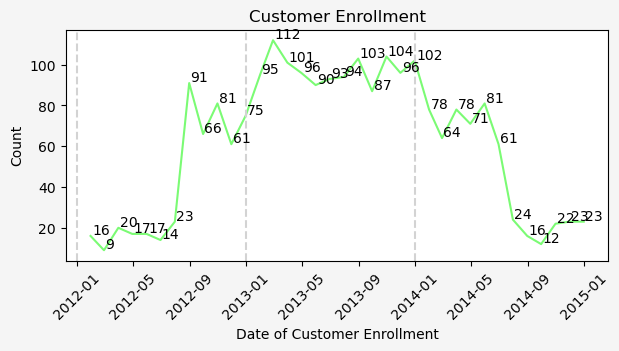

In [23]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Group data by month and count the number of records in each month
monthly_counts = data.groupby(pd.Grouper(key='Dt_Customer', freq='M')).count().ID

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(7,3))

# Set the background color
fig.set_facecolor('whitesmoke')

# Create the line chart
plt.plot(monthly_counts.index, monthly_counts.values, onecolor)

# Add vertical lines at the start of each year
years = data['Dt_Customer'].dt.year.unique()
for year in years:
    plt.axvline(x=pd.Timestamp(year=year, month=1, day=1), color='lightgrey', linestyle='--')

# Label the peaks
for date, count in monthly_counts.iteritems():
    plt.annotate(f'{count}', xy=(date, count), xytext=(1,1), textcoords='offset points')

# Add labels and title
plt.xlabel('Date of Customer Enrollment')
plt.ylabel('Count')
plt.title('Customer Enrollment')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

#to download the plot
# plt.savefig('36Dt_Customer lineplots', format='png')

### 3.2 Bivariate data analysis

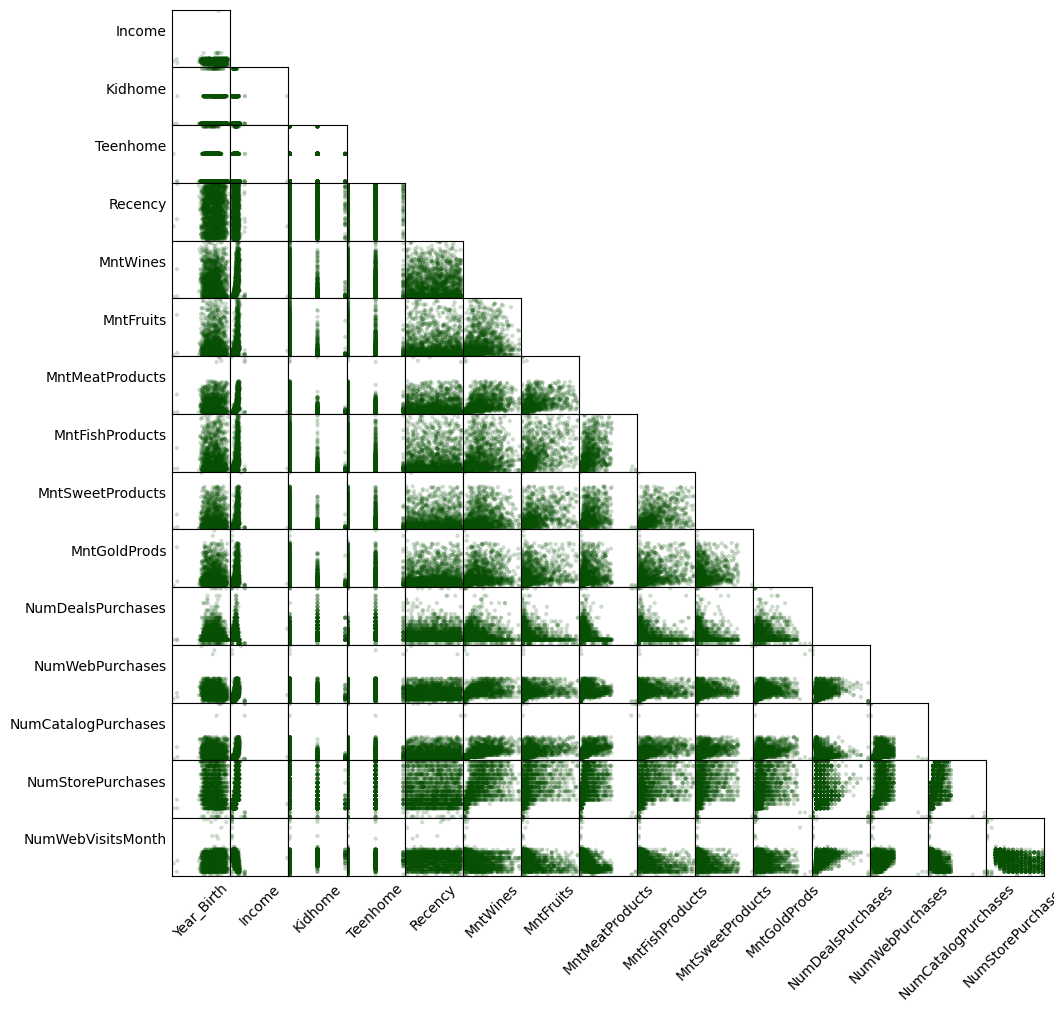

In [24]:
# Relationships
sm = pd.plotting.scatter_matrix(
    data[num_vars],
    color=scattercolor, figsize=(12,12),alpha=0.2
)

# hiding ticks
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        # rotate the label
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
        
# hiding diagonal + one half of the matrix
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)
            
pic=sm[0][0].get_figure()

#to download the plot
# plt.savefig('37Relationships bivar scatter_matrix1', format='png')

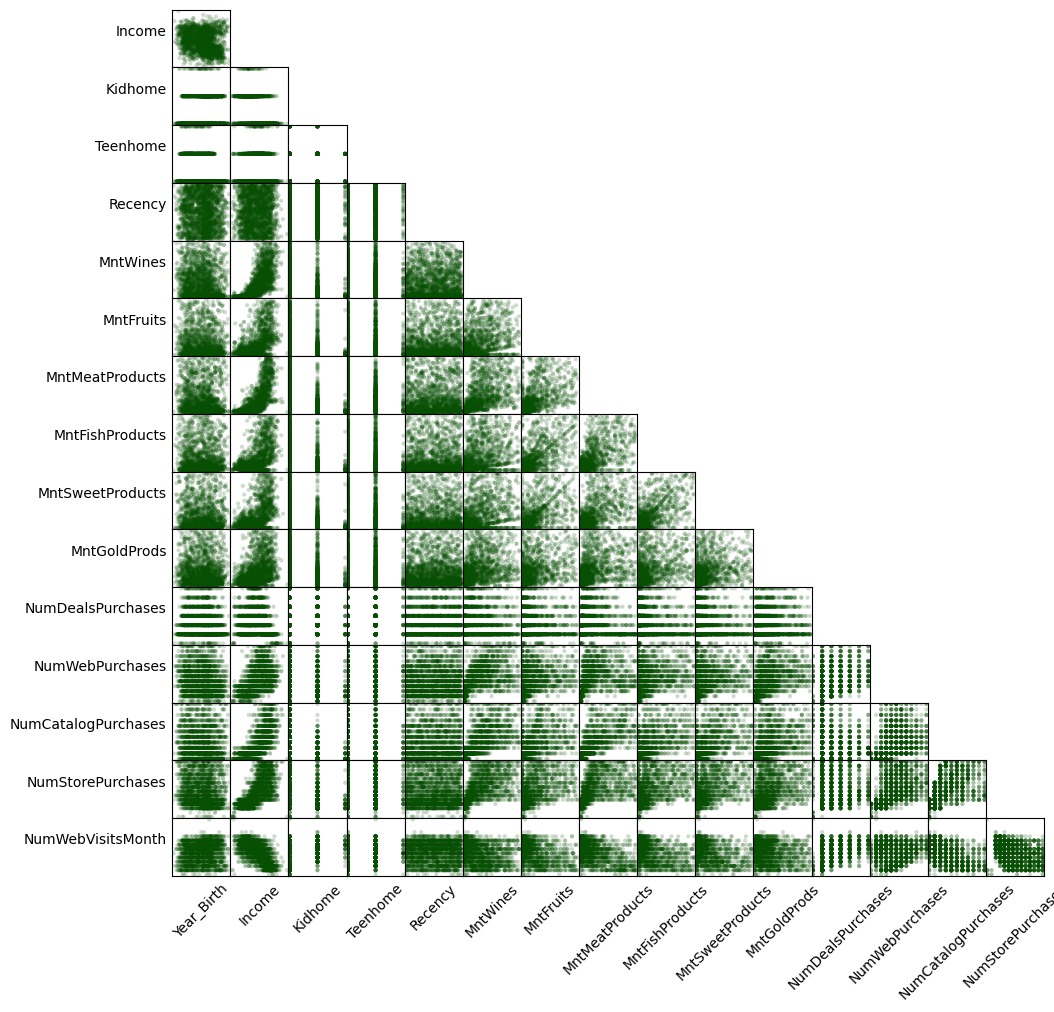

In [25]:
# due to the outliers the scatter plot is getting compressed.
data_no_outliers = data.copy()

# outlier removal -  interquartile range (IQR) method
for var in num_vars:
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_no_outliers[var] = data_no_outliers[var][(data_no_outliers[var] >= lower_bound) 
                                                  & (data_no_outliers[var] <= upper_bound)]

# Relationships
sm = pd.plotting.scatter_matrix(
    data_no_outliers[num_vars],
    color=scattercolor, figsize=(12,12), alpha=0.2
)

# Hide ticks and rotate labels
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

# Hide diagonal and one half of the matrix
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i, j].set_visible(False)

pic = sm[0][0].get_figure()

#to download the plot
# plt.savefig('37Relationships bivar scatter_matrix2', format='png')

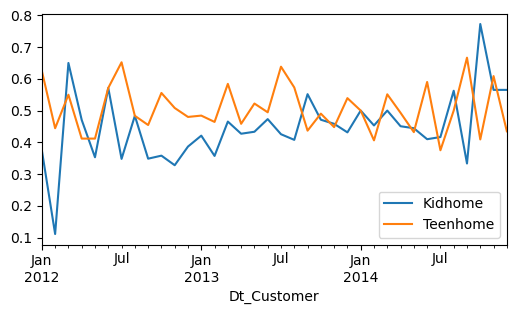

In [26]:
# Number of Kids and Teens over Time
data_home = data[['Kidhome', 'Teenhome', 'Dt_Customer']]
grouped_data = data_home.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()

grouped_data.plot(figsize=(6,3))
plt.show()

#to download the plot
# plt.savefig('38Relationships Kids and Teens over Time', format='png')

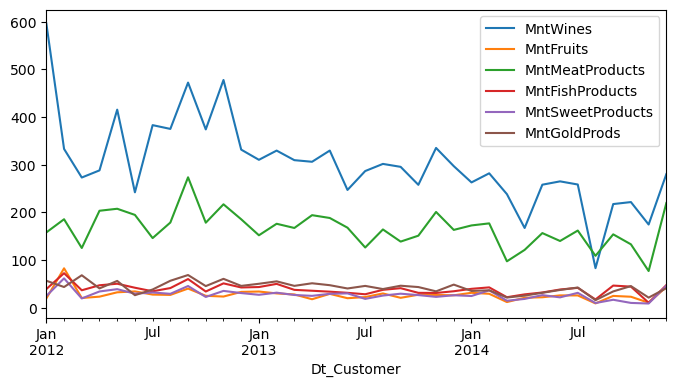

In [27]:
# Amount Spent per Product over Time
mnt = data.loc[:,data.columns.str.contains('Mnt')].columns
data_spent = data[['Dt_Customer']+list(mnt)]
grouped_data= data_spent.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()

grouped_data.plot(figsize=(8,4))
plt.show()

#to download the plot
# plt.savefig('39Relationships Amount Spent per Product over Time', format='png')

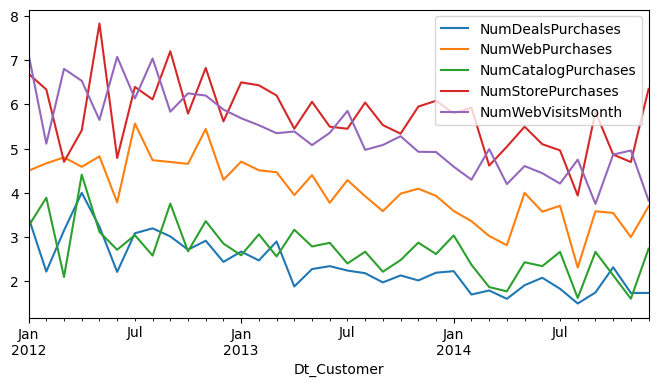

In [28]:
# Type of Purchase over Time
purchased = data.loc[:,data.columns.str.contains('Num')].columns
data_purchase_type = data[['Dt_Customer']+list(purchased)]
grouped_data= data_purchase_type.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()

grouped_data.plot(figsize=(8,4))
plt.show()

#to download the plot
# plt.savefig('391Relationships Type of Purchase over Time', format='png')

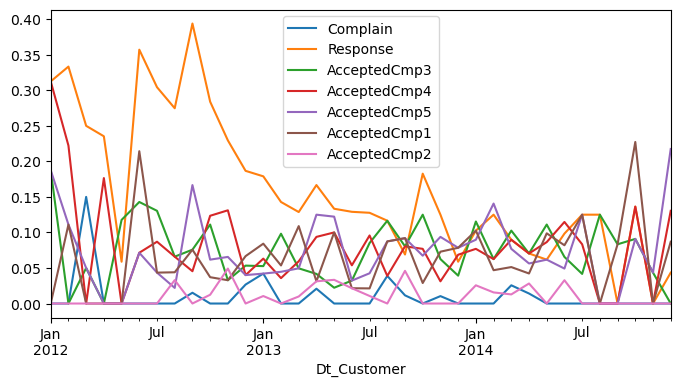

In [29]:
# Complain, Response, and Acceptance over Time
cmp = data.loc[:,data.columns.str.contains('Cmp')].columns
data_cmp = data[['Dt_Customer','Complain','Response']+list(cmp)]
grouped_data= data_cmp.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()

grouped_data.plot(figsize=(8,4))
plt.show()

#to download the plot
# plt.savefig('392aRelationships omplain, Response, and Acceptance over Time', format='png')

>*It's hard to see much, So let's merge all the AcceptedCmp.. variables to see if it get's clearer*

In [30]:
# merging AcceptedCmp variables into one : AcceptedAnyCmp
data_anycmp = data_cmp

data_anycmp['AcceptedAnyCmp'] = data[list(cmp)].max(axis=1)

data_anycmp.drop(list(cmp),axis=1,inplace=True)

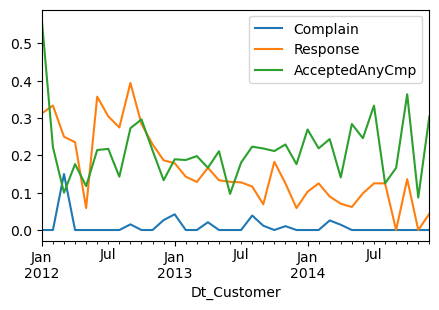

In [31]:
grouped_data= data_anycmp.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()
grouped_data.plot(figsize=(5,3))
plt.show()

#to download the plot
# plt.savefig('392bRelationships omplain, Response, and AcceptedAnyCmp over Time', format='png')

In [32]:
# Marital Status vs Education
pd.crosstab(
    index=data['Marital_Status'],columns=data['Education'],
    normalize='columns'
    ).round(2)

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Divorced,0.12,0.02,0.11,0.10,0.11
Married,0.40,0.37,0.38,0.38,0.40
Single,0.18,0.33,0.22,0.21,0.21
Together,0.28,0.26,0.26,0.28,0.24
Widow,0.02,0.02,0.03,0.03,0.05


In [33]:
# Marital Status vs Response
pd.crosstab(
    index=data['Marital_Status'],columns=data['Response'],
    normalize='columns'
    ).round(2)

Response,0,1
Marital_Status,,
Divorced,0.10,0.14
Married,0.40,0.29
Single,0.20,0.33
Together,0.27,0.18
Widow,0.03,0.05


In [34]:
# Education vs Response
pd.crosstab(
    index=data['Education'],columns=data['Response'],
    normalize='columns'
    ).round(2)

Response,0,1
Education,,
2n Cycle,0.09,0.07
Basic,0.03,0.01
Graduation,0.51,0.46
Master,0.16,0.17
PhD,0.20,0.30


___
## 4. Data Preparation and Splitting
### 4.1 Data Preparation

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [38]:
df = data.copy()
# we have two objects Education, Marital_Status
# perform feature encoding
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [39]:
#  for modeling combined All AcceptedCmp into one : AccepterAnyCmp 

df['AcceptedAnyCmp'] = data[list(cmp)].max(axis=1)

df.drop(list(cmp),axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2216 non-null   int64
 1   Year_Birth           2216 non-null   int64
 2   Education            2216 non-null   int32
 3   Marital_Status       2216 non-null   int32
 4   Income               2216 non-null   int64
 5   Kidhome              2216 non-null   int64
 6   Teenhome             2216 non-null   int64
 7   Dt_Customer          2216 non-null   int64
 8   Recency              2216 non-null   int64
 9   MntWines             2216 non-null   int64
 10  MntFruits            2216 non-null   int64
 11  MntMeatProducts      2216 non-null   int64
 12  MntFishProducts      2216 non-null   int64
 13  MntSweetProducts     2216 non-null   int64
 14  MntGoldProds         2216 non-null   int64
 15  NumDealsPurchases    2216 non-null   int64
 16  NumWebPurchases      221

>In this scenario, where the columns Z_CostContact and Z_Revenue are constant values(always equal to 
3 and 11, respectively),it is generally recommended to drop these columns before modeling.  
Since these columns do not provide any variation or useful information for predicting the 
customer's response to an offer, including them in the model will not contribute to 
its predictive power. 
Including constant columns can even introduce noise and potentially negatively impact the 
model's performance.


In [40]:
df.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [41]:
df[['Education','Marital_Status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Education       2216 non-null   int32
 1   Marital_Status  2216 non-null   int32
dtypes: int32(2)
memory usage: 34.6 KB


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2216 non-null   int64
 1   Year_Birth           2216 non-null   int64
 2   Education            2216 non-null   int32
 3   Marital_Status       2216 non-null   int32
 4   Income               2216 non-null   int64
 5   Kidhome              2216 non-null   int64
 6   Teenhome             2216 non-null   int64
 7   Dt_Customer          2216 non-null   int64
 8   Recency              2216 non-null   int64
 9   MntWines             2216 non-null   int64
 10  MntFruits            2216 non-null   int64
 11  MntMeatProducts      2216 non-null   int64
 12  MntFishProducts      2216 non-null   int64
 13  MntSweetProducts     2216 non-null   int64
 14  MntGoldProds         2216 non-null   int64
 15  NumDealsPurchases    2216 non-null   int64
 16  NumWebPurchases      221

### 4.2 Data Splitting

In [ ]:
# Prepare the data
x = df.drop('Response', axis=1)  # Features
y = df['Response']  # Target variable

In [ ]:
print("shape of x: ",x.shape)
print("shape of y: ",y.shape)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
print("shape of X_train: ",X_train.shape)
print("shape of Y_train: ",Y_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_test: ",Y_test.shape)

___
## 5. Model Selection and Training
5.1 Logistic Regression  
5.2 Decision Trees    

### 5.1 Logistic Regression

In [ ]:
# instance of LogisticRegression
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, Y_train)

# Predict the target variable for the test data
Y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_model_accuracy = accuracy_score(Y_test, Y_pred) * 100
lr_model_precision = precision_score(Y_test, Y_pred) * 100
lr_model_recall = recall_score(Y_test, Y_pred) * 100
lr_model_f1 = f1_score(Y_test, Y_pred) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Logistic Regression Model:\n")
print("\tAccuracy: {:.2f}%".format(lr_model_accuracy))
print("\tPrecision: {:.2f}%".format(lr_model_precision))
print("\tRecall: {:.2f}%".format(lr_model_recall))
print("\tF1-Score: {:.2f}%".format(lr_model_f1))

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
# Create the confusion matrix
lr_model_cm = confusion_matrix(Y_test, Y_pred)
lr_model_cm

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,2))
sns.heatmap(lr_model_cm/np.sum(lr_model_cm), annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 5.2 Decision Trees 

In [ ]:
# instance of Decision Tree Classsifier
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train,Y_train)

# Predict the target variable for the test data
Y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_model_accuracy = accuracy_score(Y_test, Y_pred) * 100
dt_model_precision = precision_score(Y_test, Y_pred) * 100
dt_model_recall = recall_score(Y_test, Y_pred) * 100
dt_model_f1 = f1_score(Y_test, Y_pred) * 100

# Print the evaluation metrics with percentages
print("Evaluation metrics of Decision Trees Model:\n")
print("\tAccuracy: {:.2f}%".format(dt_model_accuracy))
print("\tPrecision: {:.2f}%".format(dt_model_precision))
print("\tRecall: {:.2f}%".format(dt_model_recall))
print("\tF1-Score: {:.2f}%".format(dt_model_f1))

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
# Create the confusion matrix
dt_model_cm = confusion_matrix(Y_test, Y_pred)
dt_model_cm

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,2))
sns.heatmap(dt_model_cm/np.sum(dt_model_cm), 
            annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Confusion Matrix of Decision Trees\n")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

___
## 6. Evaluating  Model Performance

In [ ]:
# Create a dictionary to store the metric values
evaluation_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [lr_model_accuracy, lr_model_precision, lr_model_recall, lr_model_f1],
    "Decision Tree": [dt_model_accuracy, dt_model_precision, dt_model_recall, dt_model_f1]
}

# Create a pandas DataFrame from the dictionary
tab = pd.DataFrame(evaluation_metrics)

# Set "Metric" column as the index
tab.set_index("Metric", inplace=True)
tab = tab.round(2)
# Print the tabulated comparison
print(tab)

In [ ]:
# before dropping the constant columns
#     Logistic Regression  Decision Tree
#Metric                                       
#Accuracy                 83.91          84.36
#Precision                45.71          50.00
#Recall                   15.38          48.08
#F1-Score                 23.02          49.02

In [ ]:
# ___
# 7. Conclusion